## **Load and Clean the Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_json('transactions.txt', lines=True)
df.head(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


In [3]:
df.shape

(786363, 29)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [5]:
print('Maximum disbursal rate: ', pd.to_datetime(df['transactionDateTime']).max())
print('Minimum disbursal rate: ', pd.to_datetime(df['transactionDateTime']).min())

Maximum disbursal rate:  2016-12-30 23:59:45
Minimum disbursal rate:  2016-01-01 00:01:02


- Dataset has information for 786363 transactions
- There are 29 variables
- The data covers transactions between January and December 2016

In [6]:
df['isFraud'].value_counts()

,count
isFraud,
False,773946
True,12417


Out of 786,363 transactions, there are 12,417 transactions that are fraud.

In [7]:
df['isFraud'].value_counts(normalize=True)

,proportion
isFraud,
False,0.98421
True,0.01579


The rate of fraudulent transaction is about 1.58%.

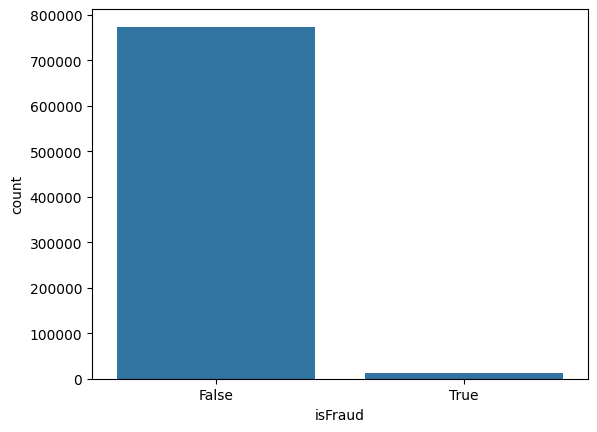

In [8]:
sns.countplot(x = "isFraud", data = df)
plt.show()

The dataset is highly imbalanced!

In [9]:
#Check columns with null values
df.isnull().any()

,0
accountNumber,False
customerId,False
creditLimit,False
availableMoney,False
transactionDateTime,False
transactionAmount,False
merchantName,False
acqCountry,False
merchantCountryCode,False
posEntryMode,False


There is no missing value.

In [16]:
#Check columns with empty strings
(df == '').any()

,0
accountNumber,False
customerId,False
creditLimit,False
availableMoney,False
transactionDateTime,False
transactionAmount,False
merchantName,False
acqCountry,False
merchantCountryCode,False
posEntryMode,False


There are 11 columns that have empty strings.

In [11]:
df['acqCountry'].value_counts()

,count
acqCountry,
US,774709
,4562
MEX,3130
CAN,2424
PR,1538


###Handling empty strings
There are some rows in the dataset that contain empty strings. To handle this, I consider two options:
- Option 1: Replace empty values with a placeholder ("Missing")
- Option 2: Drop rows with empty values

Option 1 keeps all rows and allows the model to potentially learn fron the missingness itself but may add noise. Option 2 offers cleaner data but may lose some important training samples.

I will use both options and compare their impact on model performance.




**Option 1: Replace empty values with a placeholder**

In [15]:
#Replace empty strings with 'Missing'
df_missing = df.replace('', 'Missing')
#Check if the df still has empty strings
(df_missing == '').any()

,0
accountNumber,False
customerId,False
creditLimit,False
availableMoney,False
transactionDateTime,False
transactionAmount,False
merchantName,False
acqCountry,False
merchantCountryCode,False
posEntryMode,False


In [14]:
#Drop rows that contain empty strings
df_dropped = df[~(df == '').any(axis=1)].copy()
#Check rows and columns of this df
df_dropped.shape

(786363, 29)

In [ ]:
df['accountAge'] = pd.to_datetime(df['transactionDateTime']) - pd.to_datetime(df['accountOpenDate'])
df['accountAge'].head(5)

,accountAge
0,518 days 14:27:32
1,577 days 05:05:54
2,605 days 09:18:39
3,637 days 02:14:50
4,231 days 21:04:46


In [ ]:
df['accountAge'] = df['accountAge'] // np.timedelta64(1, 'D')
df['accountAge'].head(5)

,accountAge
0,518
1,577
2,605
3,637
4,231


In [ ]:
df = df.drop(['accountOpenDate'], axis=1)

In [ ]:
#Days until expired date
df['accountActiveDays'] = (pd.to_datetime(df['currentExpDate']) + pd.offsets.MonthEnd(0) - pd.to_datetime(df['transactionDateTime'])).dt.days
df['accountActiveDays'].head(5)

/tmp/ipython-input-82-1834258486.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['accountActiveDays'] = (pd.to_datetime(df['currentExpDate']) + pd.offsets.MonthEnd(0) - pd.to_datetime(df['transactionDateTime'])).dt.days


,accountActiveDays
0,2511
1,2696
2,3217
3,3185
4,4968


In [ ]:
df = df.drop(['currentExpDate'], axis=1)

In [ ]:
df[df['accountNumber'] != df['customerId']]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,accountAge,accountActiveDays


In [ ]:
df = df.drop(['customerId'], axis=1)

## **Exploratory Data Analysis**

In [ ]:
df.nunique()

,0
accountNumber,5000
creditLimit,10
availableMoney,521915
transactionDateTime,776637
transactionAmount,66038
merchantName,2490
acqCountry,5
merchantCountryCode,5
posEntryMode,6
posConditionCode,4


In [ ]:
#Drop columns that have only 1 value
cols_drop = ['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd']
df = df.drop(columns=cols_drop, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   creditLimit               786363 non-null  int64  
 2   availableMoney            786363 non-null  float64
 3   transactionDateTime       786363 non-null  object 
 4   transactionAmount         786363 non-null  float64
 5   merchantName              786363 non-null  object 
 6   acqCountry                786363 non-null  object 
 7   merchantCountryCode       786363 non-null  object 
 8   posEntryMode              786363 non-null  object 
 9   posConditionCode          786363 non-null  object 
 10  merchantCategoryCode      786363 non-null  object 
 11  dateOfLastAddressChange   786363 non-null  object 
 12  cardCVV                   786363 non-null  int64  
 13  enteredCVV                786363 non-null  i

In [ ]:
cols_category = ['accountNumber', 'creditLimit',  'cardCVV', 'enteredCVV', 'cardLast4Digits']
df[cols_category] = df[cols_category].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   accountNumber             786363 non-null  category
 1   creditLimit               786363 non-null  category
 2   availableMoney            786363 non-null  float64 
 3   transactionDateTime       786363 non-null  object  
 4   transactionAmount         786363 non-null  float64 
 5   merchantName              786363 non-null  object  
 6   acqCountry                786363 non-null  object  
 7   merchantCountryCode       786363 non-null  object  
 8   posEntryMode              786363 non-null  object  
 9   posConditionCode          786363 non-null  object  
 10  merchantCategoryCode      786363 non-null  object  
 11  dateOfLastAddressChange   786363 non-null  object  
 12  cardCVV                   786363 non-null  category
 13  enteredCVV                786

In [ ]:
def explore_categorical(col_name):
    print("{0} Counts".format(col_name))
    print(df[col_name].value_counts())
    print("\n")

    print("{0} Ratio".format(col_name))
    print(df[col_name].value_counts(normalize=True))
    print("\n")

    print("{0} Default Counts".format(col_name))
    print(df.groupby(col_name, observed=False)['isFraud'].value_counts().unstack(level=-1))
    print("\n")

    print("{0} Default Ratio".format(col_name))
    print(df.groupby(col_name, observed=False)['isFraud'].value_counts(normalize=True).unstack(level=-1))


In [ ]:
explore_categorical('accountNumber')

accountNumber Counts
accountNumber
380680241    32850
882815134    13189
570884863    10867
246251253    10172
369308035     7229
             ...  
807705524        1
749645399        1
253649418        1
897071504        1
984589832        1
Name: count, Length: 5000, dtype: int64


accountNumber Ratio
accountNumber
380680241    0.041775
882815134    0.016772
570884863    0.013819
246251253    0.012936
369308035    0.009193
               ...   
807705524    0.000001
749645399    0.000001
253649418    0.000001
897071504    0.000001
984589832    0.000001
Name: proportion, Length: 5000, dtype: float64


accountNumber Default Counts
isFraud        False  True 
accountNumber              
100088067         74      1
100108752         18      0
100328049        103      0
100663626         31      0
100737756        177      1
...              ...    ...
999086814        672      5
999257059        158      2
999258704         87      1
999283629        141      0
999389635          9    

In [ ]:
explore_categorical('creditLimit')

creditLimit Counts
creditLimit
5000     201863
15000    139307
7500      97913
2500      75429
20000     68629
10000     56889
50000     48781
1000      36430
250       34025
500       27097
Name: count, dtype: int64


creditLimit Ratio
creditLimit
5000     0.256705
15000    0.177154
7500     0.124514
2500     0.095921
20000    0.087274
10000    0.072344
50000    0.062034
1000     0.046327
250      0.043269
500      0.034459
Name: proportion, dtype: float64


creditLimit Default Counts
isFraud       False  True 
creditLimit               
250           33618    407
500           26632    465
1000          35884    546
2500          74313   1116
5000         198336   3527
7500          96623   1290
10000         56123    766
15000        136762   2545
20000         67715    914
50000         47940    841


creditLimit Default Ratio
isFraud         False     True 
creditLimit                    
250          0.988038  0.011962
500          0.982839  0.017161
1000         0.985012  0.0149

In [ ]:
explore_categorical('transactionType')

transactionType Counts
transactionType
PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
Missing                    698
Name: count, dtype: int64


transactionType Ratio
transactionType
PURCHASE                0.947645
REVERSAL                0.025819
ADDRESS_VERIFICATION    0.025648
Missing                 0.000888
Name: proportion, dtype: float64


transactionType Default Counts
isFraud                False  True 
transactionType                    
ADDRESS_VERIFICATION   20053    116
Missing                  684     14
PURCHASE              733243  11950
REVERSAL               19966    337


transactionType Default Ratio
isFraud                  False     True 
transactionType                         
ADDRESS_VERIFICATION  0.994249  0.005751
Missing               0.979943  0.020057
PURCHASE              0.983964  0.016036
REVERSAL              0.983401  0.016599


In [ ]:
explore_categorical('merchantCountryCode')

merchantCountryCode Counts
merchantCountryCode
US         778511
MEX          3143
CAN          2426
PR           1559
Missing       724
Name: count, dtype: int64


merchantCountryCode Ratio
merchantCountryCode
US         0.990015
MEX        0.003997
CAN        0.003085
PR         0.001983
Missing    0.000921
Name: proportion, dtype: float64


merchantCountryCode Default Counts
isFraud               False  True 
merchantCountryCode               
CAN                    2370     56
MEX                    3079     64
Missing                 642     82
PR                     1532     27
US                   766323  12188


merchantCountryCode Default Ratio
isFraud                 False     True 
merchantCountryCode                    
CAN                  0.976917  0.023083
MEX                  0.979637  0.020363
Missing              0.886740  0.113260
PR                   0.982681  0.017319
US                   0.984344  0.015656


In [ ]:
df.describe()

,availableMoney,transactionAmount,currentBalance,accountAge,accountActiveDays
count,786363.000000,786363.000000,786363.000000,786363.000000,786363.00000
mean,6250.725369,136.985791,4508.739089,883.532634,3762.87292
std,8880.783989,147.725569,6457.442068,697.504581,1446.24208
min,-1005.630000,0.000000,0.000000,1.000000,1095.00000
25%,1077.420000,33.650000,689.910000,430.000000,2513.00000
50%,3184.860000,87.900000,2451.760000,680.000000,3767.00000
75%,7500.000000,191.480000,5291.095000,1108.000000,5012.00000
max,50000.000000,2011.540000,47498.810000,9990.000000,6451.00000


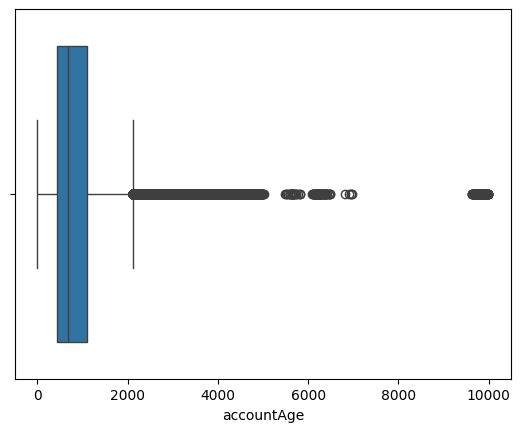

In [ ]:
sns.boxplot(x="accountAge", data=df)
plt.show()

In [ ]:
df.groupby('isFraud')['accountAge'].describe()

,count,mean,std,min,25%,50%,75%,max
isFraud,,,,,,,,
False,773946.0,884.053782,697.801168,1.0,430.0,680.0,1110.0,9990.0
True,12417.0,851.049770,677.999851,12.0,427.0,667.0,1007.0,9890.0


In [ ]:
df.groupby('isFraud')['accountActiveDays'].describe()

,count,mean,std,min,25%,50%,75%,max
isFraud,,,,,,,,
False,773946.0,3762.548523,1446.263209,1095.0,2512.0,3767.0,5012.0,6451.0
True,12417.0,3783.092454,1444.838922,1099.0,2559.0,3789.0,5033.0,6438.0


In [ ]:
df.groupby('isFraud')['currentBalance'].describe()

,count,mean,std,min,25%,50%,75%,max
isFraud,,,,,,,,
False,773946.0,4502.428675,6446.866656,0.0,688.0325,2446.94,5286.10,47498.81
True,12417.0,4902.064338,7074.701649,0.0,822.2100,2747.39,5644.35,47473.94


In [ ]:
df.groupby('isFraud')['transactionAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
isFraud,,,,,,,,
False,773946.0,135.570249,146.525305,0.0,33.19,86.76,189.39,2011.54
True,12417.0,225.215905,189.551393,0.0,86.00,176.98,311.46,1608.35


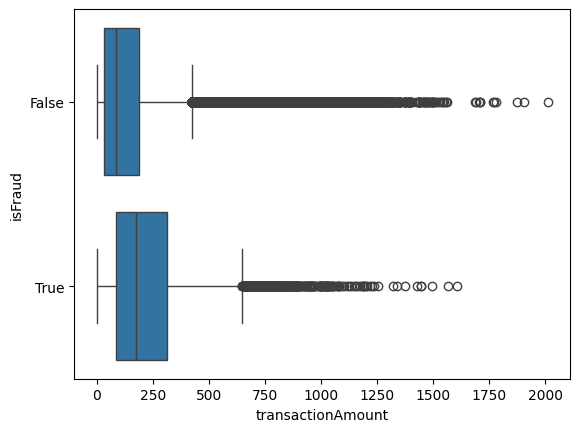

In [ ]:
sns.boxplot(x='transactionAmount', y='isFraud', data=df, orient="h")
plt.show()

In [ ]:
explore_categorical('cardPresent')

cardPresent Counts
cardPresent
False    433495
True     352868
Name: count, dtype: int64


cardPresent Ratio
cardPresent
False    0.551266
True     0.448734
Name: proportion, dtype: float64


cardPresent Default Counts
isFraud       False  True 
cardPresent               
False        424533   8962
True         349413   3455


cardPresent Default Ratio
isFraud         False     True 
cardPresent                    
False        0.979326  0.020674
True         0.990209  0.009791


In [ ]:
explore_categorical('expirationDateKeyInMatch')

expirationDateKeyInMatch Counts
expirationDateKeyInMatch
False    785320
True       1043
Name: count, dtype: int64


expirationDateKeyInMatch Ratio
expirationDateKeyInMatch
False    0.998674
True     0.001326
Name: proportion, dtype: float64


expirationDateKeyInMatch Default Counts
isFraud                    False  True 
expirationDateKeyInMatch               
False                     772916  12404
True                        1030     13


expirationDateKeyInMatch Default Ratio
isFraud                      False     True 
expirationDateKeyInMatch                    
False                     0.984205  0.015795
True                      0.987536  0.012464


## **Data Preprocessing**

In [ ]:
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])

In [ ]:
df[df['transactionType']=='REVERSAL']

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,accountAge,accountActiveDays
39,574788567,2500,2200.98,2016-05-24 01:38:03,215.13,Convenient Tire,US,US,09,01,...,206,206,8522,REVERSAL,299.02,True,False,False,224,1985
73,574788567,2500,2432.72,2016-10-07 10:23:57,3.87,Eazy Repair,US,US,05,01,...,579,579,4219,REVERSAL,67.28,True,False,False,360,2214
101,924729945,50000,49831.43,2016-10-19 14:01:45,168.57,discount.com,US,US,05,01,...,205,265,9459,REVERSAL,168.57,False,False,False,817,2963
133,984504651,50000,46367.41,2016-01-16 09:53:15,450.74,Planet Fitness #849960,US,US,05,01,...,640,640,8332,REVERSAL,3632.59,False,False,False,173,4610
156,984504651,50000,41909.30,2016-01-25 20:39:15,81.73,AMC #724446,US,US,09,01,...,640,640,8332,REVERSAL,8090.70,True,False,False,182,5818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786106,899818521,2500,968.33,2016-09-29 02:04:32,10.05,cheapfast.com,US,US,02,99,...,421,421,3424,REVERSAL,1531.67,False,False,False,1202,5264
786120,638498773,10000,9798.21,2016-01-01 19:48:03,201.79,KFC #928167,US,US,05,01,...,175,175,321,REVERSAL,201.79,True,False,False,410,6177
786219,638498773,10000,5331.33,2016-11-03 04:23:26,86.14,Dunkin' Donuts #396342,US,US,05,01,...,387,387,4635,REVERSAL,4668.67,True,False,False,717,3069
786225,638498773,10000,4393.10,2016-11-06 22:54:25,49.39,Shake Shack #118502,US,US,05,01,...,387,387,4635,REVERSAL,5606.90,True,False,False,720,4618


In [ ]:
print("Number of reversal transactions: ", df[df['transactionType']=='REVERSAL'].shape[0])

Number of reversal transactions:  20303


In [ ]:
#Sort time
df = df.sort_values(by=['accountNumber', 'merchantName', 'transactionAmount', 'transactionDateTime'])

group_cols = ['accountNumber', 'merchantName', 'transactionAmount']
df['prev_time'] = df.groupby(group_cols, observed=False)['transactionDateTime'].shift(1) #find the row befofe current one

df['time_diff_min'] = (df['transactionDateTime'] - df['prev_time']).dt.total_seconds() / 60

#Time: 0-5 mins
df['isMultiSwipe'] = ((df['transactionType'] != 'REVERSAL') & (df['time_diff_min'].between(0, 5)))

In [ ]:
df[df['isMultiSwipe']==True]

,accountNumber,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,...,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,accountAge,accountActiveDays,prev_time,time_diff_min,isMultiSwipe
541956,100088067,50000,49275.09,2016-10-16 18:01:02,411.35,Fresh Flowers,US,US,02,08,...,PURCHASE,724.91,False,False,False,1011,1170,2016-10-16 18:01:00,0.033333,True
151518,100737756,250,177.98,2016-07-10 14:32:06,43.25,34th BBQ #166379,US,US,02,01,...,PURCHASE,72.02,True,False,False,385,4646,2016-07-10 14:31:07,0.983333,True
151427,100737756,250,-44.75,2016-01-18 01:55:28,693.50,Franks Deli,US,US,05,01,...,PURCHASE,294.75,True,False,False,211,3359,2016-01-18 01:55:24,0.066667,True
151428,100737756,250,-535.03,2016-01-18 01:58:26,693.50,Franks Deli,US,US,05,01,...,PURCHASE,785.03,True,False,False,211,3359,2016-01-18 01:55:28,2.966667,True
151513,100737756,250,250.00,2016-07-02 12:07:00,211.22,South Steakhouse #73819,US,US,09,01,...,PURCHASE,0.00,True,False,False,377,6084,2016-07-02 12:05:04,1.933333,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389018,999086814,10000,503.05,2016-12-19 02:49:22,22.76,apple.com,US,US,05,01,...,PURCHASE,9496.95,False,False,False,779,5671,2016-12-19 02:48:24,0.966667,True
388400,999086814,10000,5450.99,2016-01-23 09:22:35,178.57,sears.com,US,US,02,01,...,PURCHASE,4549.01,False,False,False,448,6064,2016-01-23 09:20:02,2.550000,True
388759,999086814,10000,5418.98,2016-08-04 00:04:03,172.50,staples.com,US,US,05,01,...,PURCHASE,4581.02,False,False,False,642,4531,2016-08-04 00:02:27,1.600000,True
569654,999257059,15000,14177.84,2016-01-14 16:51:22,47.58,Wall Street News,US,US,09,01,...,PURCHASE,822.16,False,False,False,81,1446,2016-01-14 16:48:41,2.683333,True


In [ ]:
df.shape

(786363, 25)

In [ ]:
df = df.drop(columns=['accountNumber', 'merchantName', 'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits', 'prev_time', 'time_diff_min'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 786363 entries, 541917 to 108107
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   creditLimit               786363 non-null  category      
 1   availableMoney            786363 non-null  float64       
 2   transactionDateTime       786363 non-null  datetime64[ns]
 3   transactionAmount         786363 non-null  float64       
 4   acqCountry                786363 non-null  object        
 5   merchantCountryCode       786363 non-null  object        
 6   posEntryMode              786363 non-null  object        
 7   posConditionCode          786363 non-null  object        
 8   merchantCategoryCode      786363 non-null  object        
 9   transactionType           786363 non-null  object        
 10  currentBalance            786363 non-null  float64       
 11  cardPresent               786363 non-null  bool          
 12  ex

In [ ]:
df['transactionHour'] = pd.to_datetime(df['transactionDateTime']).dt.hour

bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

df['transactionTime'] = pd.cut(df['transactionHour'], bins=bins, labels=labels, right=False, include_lowest=True)


In [ ]:
df = df.drop('transactionDateTime', axis=1)

In [ ]:
df = df.drop('transactionHour', axis=1)

In [ ]:
df.nunique()

,0
creditLimit,10
availableMoney,521915
transactionAmount,66038
acqCountry,5
merchantCountryCode,5
posEntryMode,6
posConditionCode,4
merchantCategoryCode,19
transactionType,4
currentBalance,487318


In [ ]:
categorical_cols = ['creditLimit', 'acqCountry', 'merchantCountryCode', 'posEntryMode',
                    'posConditionCode', 'merchantCategoryCode', 'transactionType', 'transactionTime']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

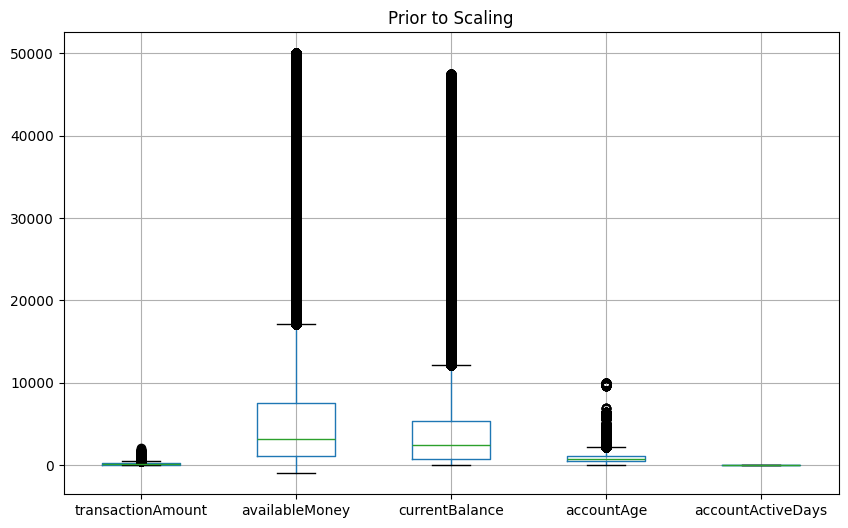

In [ ]:
numerical_cols = ['transactionAmount', 'availableMoney', 'currentBalance', 'accountAge', 'accountActiveDays']
plt.figure(figsize=(10, 6))
df[numerical_cols].boxplot()
plt.title('Prior to Scaling')
plt.show()

In [ ]:
df_logistic = df

In [ ]:
scaler = StandardScaler()
df_logistic[numerical_cols] = scaler.fit_transform(df_logistic[numerical_cols])

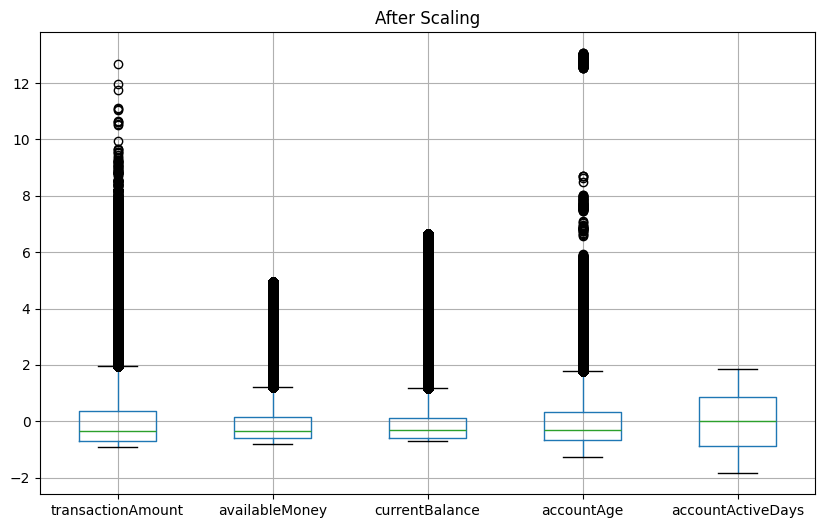

In [ ]:
plt.figure(figsize=(10, 6))
df_logistic[numerical_cols].boxplot()
plt.title('After Scaling')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score, ConfusionMatrixDisplay

In [ ]:
X = df_logistic.drop(['isFraud'], axis=1)
y = df_logistic['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

isFraud
False    0.984188
True     0.015812
Name: proportion, dtype: float64
isFraud
False    0.984295
True     0.015705
Name: proportion, dtype: float64


In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, roc_curve, auc, precision_score, ConfusionMatrixDisplay

In [ ]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
def eval_model(model, x_test, y_test):
    preds = model.predict(x_test)
    probs = model.predict_proba(x_test)

    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)

    plt.show()

    print("\n")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1: ", f1)

    #Show ROC Curve
    fpr, tpr, threshold = roc_curve(y_test, probs[:,1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("AUC: ", roc_auc)

    plot_roc_curve(fpr, tpr, roc_auc)

    results_df = pd.DataFrame()
    results_df['true_class'] = y_test
    results_df['predicted_class'] = list(preds)
    results_df['default_prob'] = probs[:, 1]

    #plot the distribution of probabilities for the estimated classes
    sns.kdeplot(data=results_df[results_df['true_class'] == 0], x='default_prob', legend="No Default", fill=True)
    sns.kdeplot(data=results_df[results_df['true_class'] == 1], x='default_prob', legend="Default", fill=True)

    plt.show()

    #see the true class versus predicted class as a percentage
    print(results_df.groupby('true_class')['predicted_class'].value_counts(normalize=True))


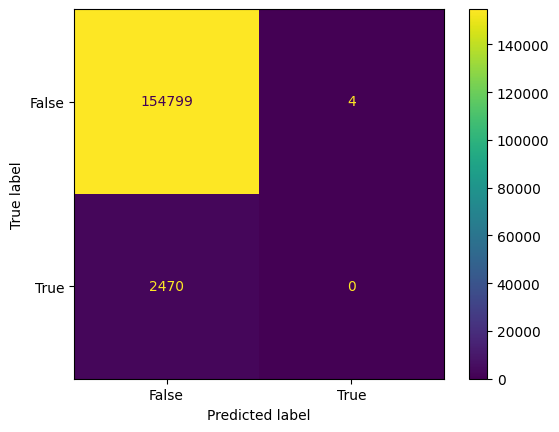



Accuracy:  0.9842693914403616
Precision:  0.0
Recall:  0.0
F1:  0.0
AUC:  0.7535708659989198


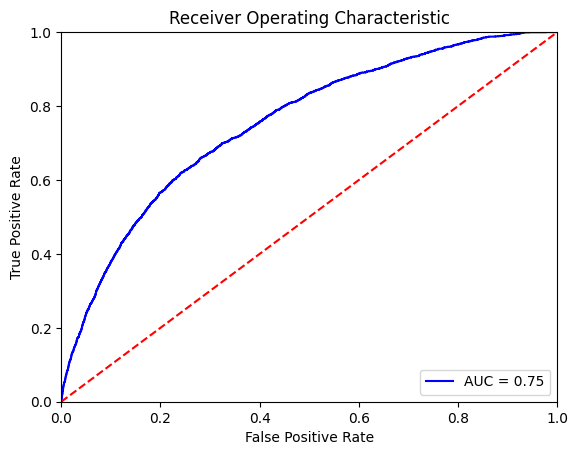

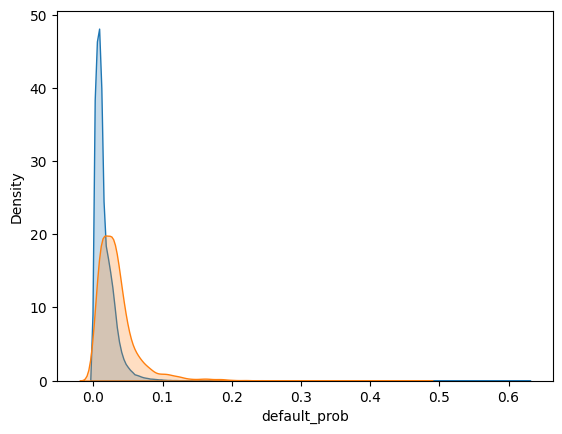

true_class  predicted_class
False       False              0.999974
            True               0.000026
True        False              1.000000
Name: proportion, dtype: float64


In [ ]:
eval_model(logistic_model, X_test, y_test)

In [ ]:
logistic_model = LogisticRegression(class_weight='balanced', max_iter=1000)
logistic_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

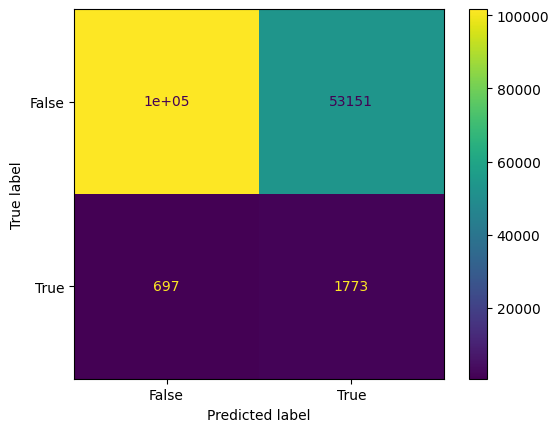



Accuracy:  0.6576144665645088
Precision:  0.03228097006772995
Recall:  0.7178137651821862
F1:  0.06178346168589051
AUC:  0.7573947099174578


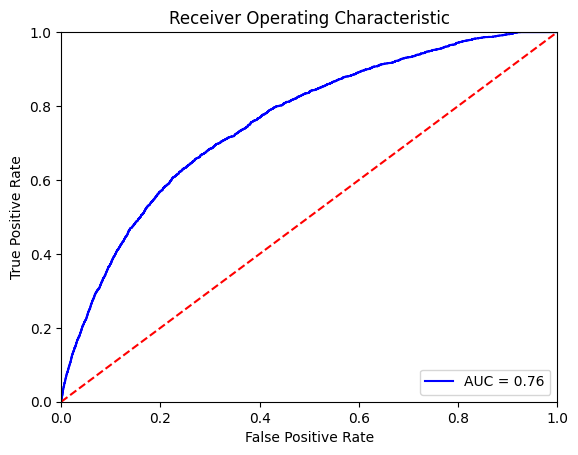

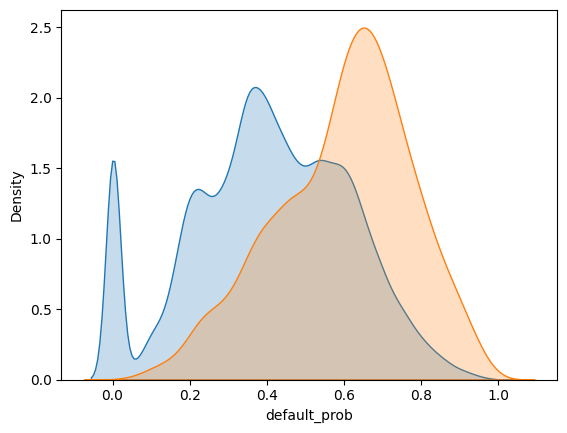

true_class  predicted_class
False       False              0.656654
            True               0.343346
True        True               0.717814
            False              0.282186
Name: proportion, dtype: float64


In [ ]:
eval_model(logistic_model, X_test, y_test)

### *Random Forest*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df_rfc = df

In [ ]:
X = df_rfc.drop(['isFraud'], axis=1)
y = df_rfc['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

isFraud
False    0.984188
True     0.015812
Name: proportion, dtype: float64
isFraud
False    0.984295
True     0.015705
Name: proportion, dtype: float64


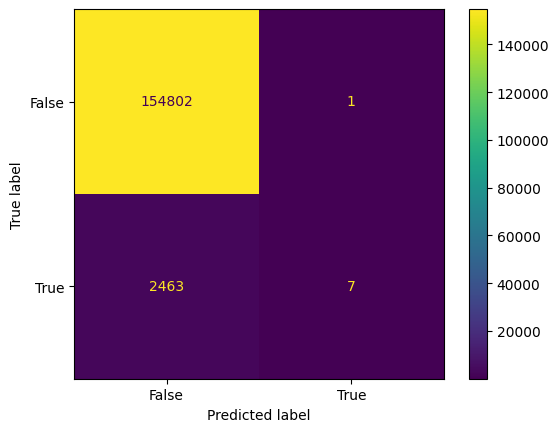



Accuracy:  0.9843329751451299
Precision:  0.875
Recall:  0.002834008097165992
F1:  0.005649717514124294
AUC:  0.7294408452942713


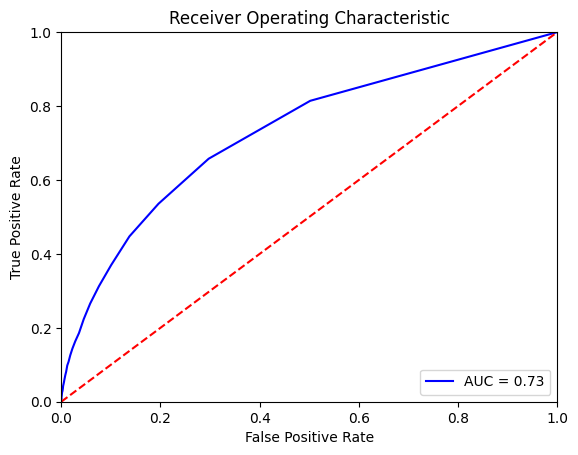

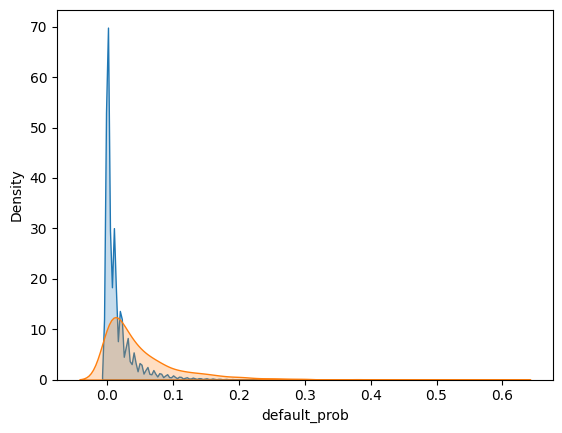

true_class  predicted_class
False       False              0.999994
            True               0.000006
True        False              0.997166
            True               0.002834
Name: proportion, dtype: float64


In [ ]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)

eval_model(rfc_model, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


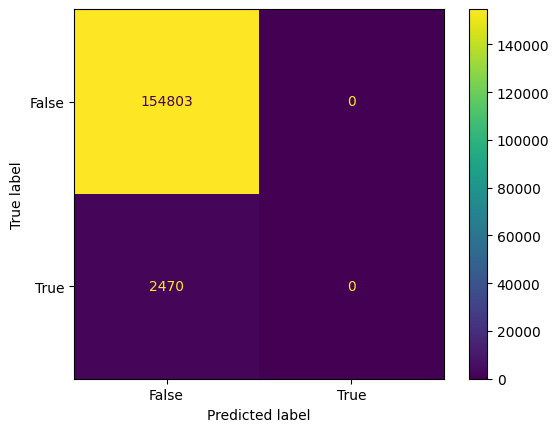



Accuracy:  0.9842948249222689
Precision:  0.0
Recall:  0.0
F1:  0.0
AUC:  0.7851616829654281


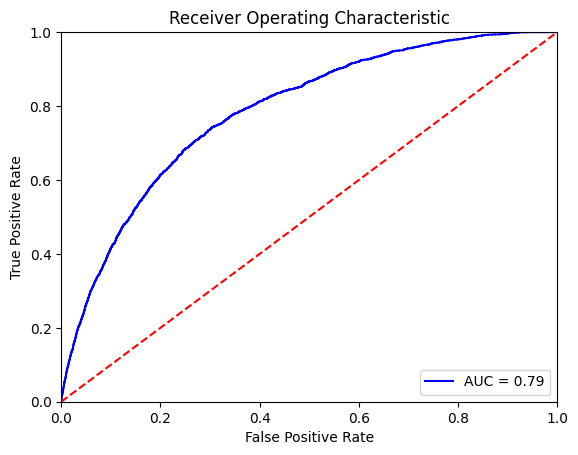

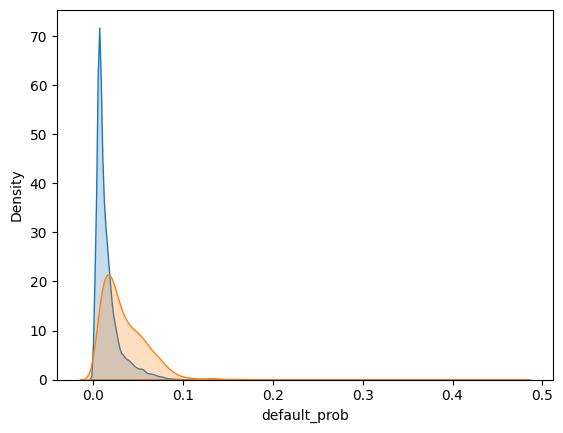

true_class  predicted_class
False       False              1.0
True        False              1.0
Name: proportion, dtype: float64


In [ ]:
rfc_model = RandomForestClassifier(n_estimators=100, max_depth=15)
rfc_model.fit(X_train, y_train)

eval_model(rfc_model, X_test, y_test)

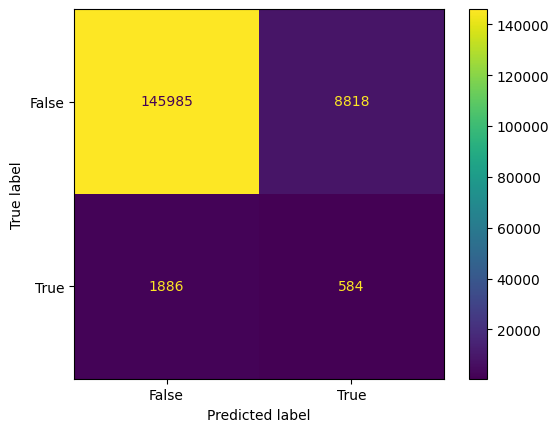



Accuracy:  0.9319400024161808
Precision:  0.06211444373537545
Recall:  0.23643724696356275
F1:  0.09838274932614555
AUC:  0.7731077458483803


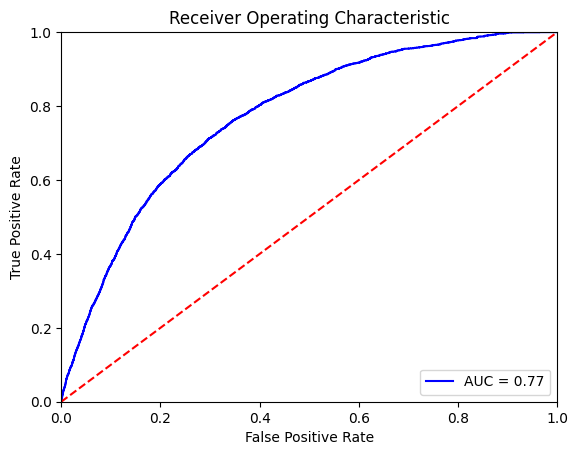

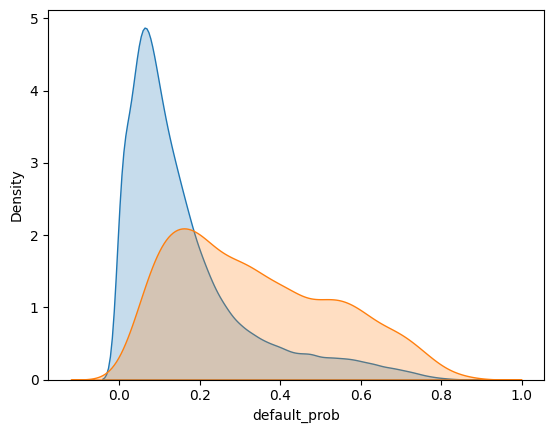

true_class  predicted_class
False       False              0.943037
            True               0.056963
True        False              0.763563
            True               0.236437
Name: proportion, dtype: float64


In [ ]:
rfc_model = RandomForestClassifier(class_weight='balanced', max_depth=25)
rfc_model.fit(X_train, y_train)

eval_model(rfc_model, X_test, y_test)

### **Resampling**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

In [ ]:
def balance_sample(X_train, y_train, sample_mode='up'):
    train_df = X_train.copy()
    train_df['isFraud'] = y_train

    train_minority = train_df[train_df['isFraud'] == 1]
    train_majority = train_df[train_df['isFraud'] == 0]

    train_sampled_df = pd.DataFrame()

    if sample_mode == 'down':
        train_majority_down = resample(train_majority, replace=False,  n_samples=train_minority.shape[0], random_state=123)
        train_sampled_df = pd.concat([train_minority, train_majority_down])
    else:
        train_minority_up = resample(train_minority, replace=True,  n_samples=train_majority.shape[0], random_state=123)
        train_sampled_df = pd.concat([train_majority, train_minority_up])

    X_train_samp = train_sampled_df.drop(['isFraud'], axis=1)
    y_train_samp = train_sampled_df['isFraud']

    return X_train_samp, y_train_samp

In [ ]:
X_train_dwn, y_train_dwn = balance_sample(X_train, y_train, sample_mode='down')

print(y_train_dwn.value_counts())
print(y_train_dwn.value_counts(normalize=True))

isFraud
True     9947
False    9947
Name: count, dtype: int64
isFraud
True     0.5
False    0.5
Name: proportion, dtype: float64


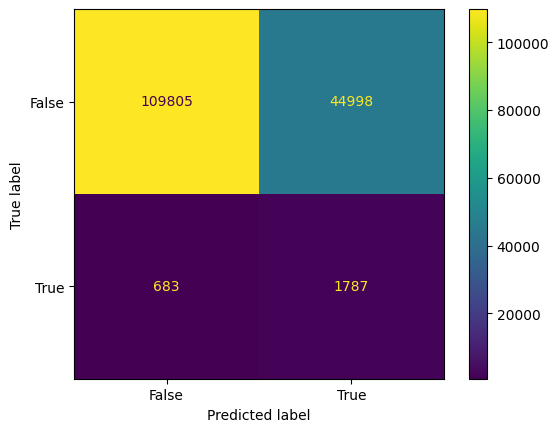



Accuracy:  0.7095432782486505
Precision:  0.0381960029924121
Recall:  0.7234817813765182
F1:  0.07256116130342097
AUC:  0.7815582367047098


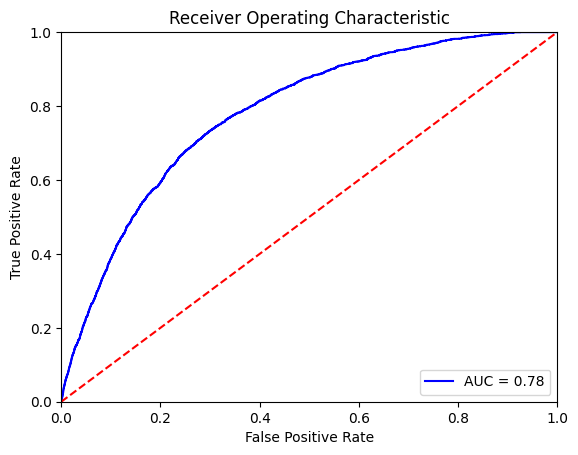

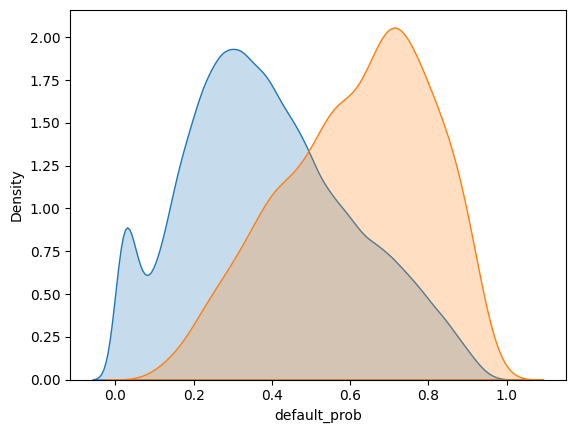

true_class  predicted_class
False       False              0.709321
            True               0.290679
True        True               0.723482
            False              0.276518
Name: proportion, dtype: float64


In [ ]:
rfc_model = RandomForestClassifier(n_estimators = 100, max_depth = 30)

rfc_model.fit(X_train_dwn, y_train_dwn)
eval_model(rfc_model, X_test, y_test)

In [ ]:
X = df_logistic.drop(['isFraud'], axis=1)
y = df_logistic['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

isFraud
False    0.984188
True     0.015812
Name: proportion, dtype: float64
isFraud
False    0.984295
True     0.015705
Name: proportion, dtype: float64


In [ ]:
X_train_dwn, y_train_dwn = balance_sample(X_train, y_train, sample_mode='down')

print(y_train_dwn.value_counts())
print(y_train_dwn.value_counts(normalize=True))

isFraud
True     9947
False    9947
Name: count, dtype: int64
isFraud
True     0.5
False    0.5
Name: proportion, dtype: float64


In [ ]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_dwn, y_train_dwn)

LogisticRegression(max_iter=1000)

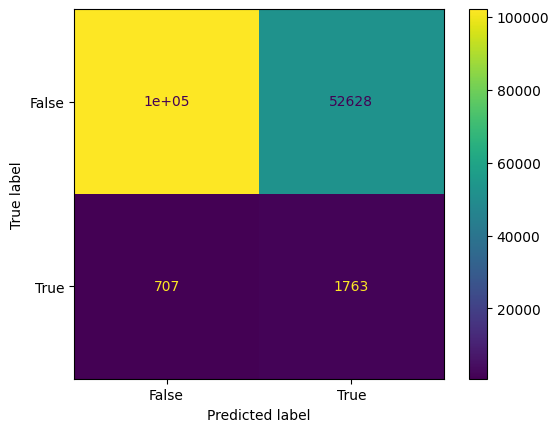



Accuracy:  0.6608763106191146
Precision:  0.03241345075472045
Recall:  0.7137651821862349
F1:  0.062010868609415945
AUC:  0.7561942890926724


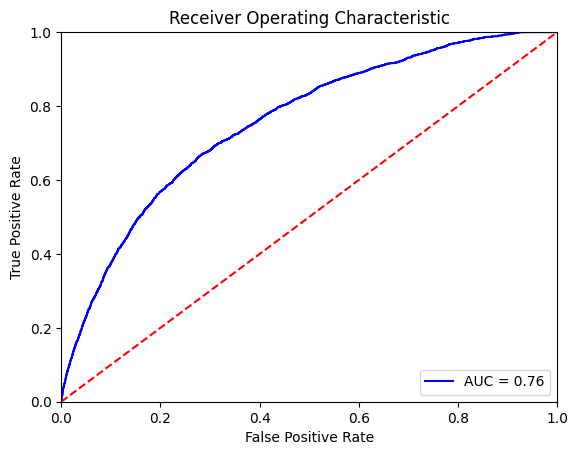

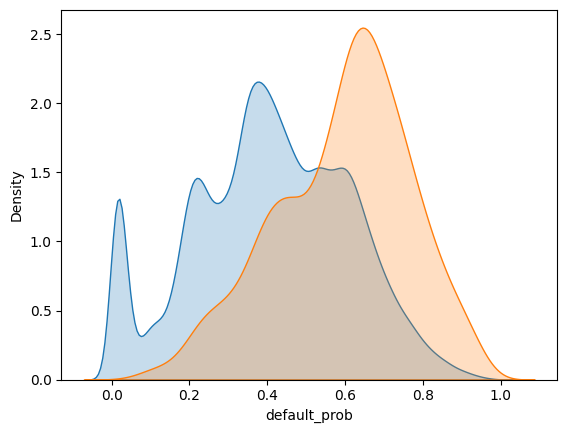

true_class  predicted_class
False       False              0.660032
            True               0.339968
True        True               0.713765
            False              0.286235
Name: proportion, dtype: float64


In [ ]:
eval_model(logistic_model, X_test, y_test)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())


Before SMOTE: isFraud
False    619143
True       9947
Name: count, dtype: int64
After SMOTE: isFraud
False    619143
True     619143
Name: count, dtype: int64


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_smote, y_train_smote)


LogisticRegression(max_iter=1000)

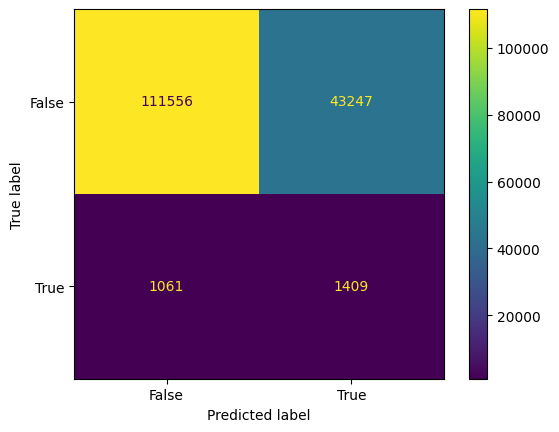



Accuracy:  0.7182733209133163
Precision:  0.0315523109996417
Recall:  0.5704453441295546
F1:  0.05979713958324492
AUC:  0.7021933401001942


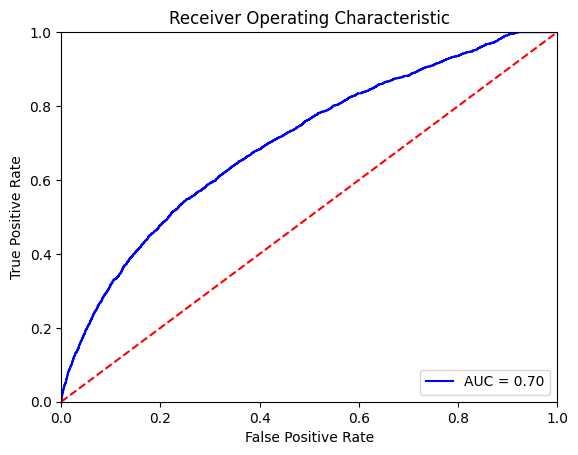

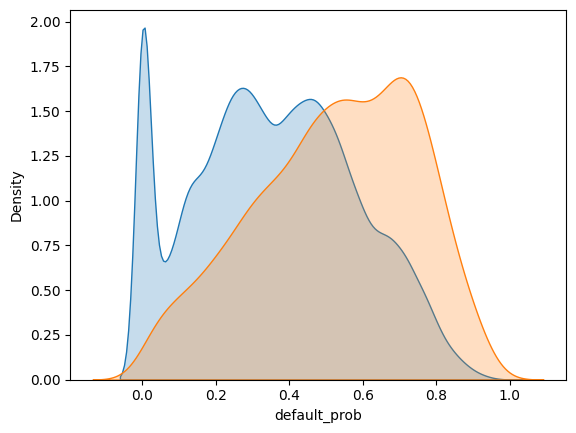

true_class  predicted_class
False       False              0.720632
            True               0.279368
True        True               0.570445
            False              0.429555
Name: proportion, dtype: float64


In [ ]:
eval_model(model, X_test, y_test)